# Modified HDF5 Loader

The HDF5 loader now has 3 new parameters: flip_enable, rot90_enable, and crop_enable.
When true, these will cause the HDF5 iterator to randomly flip, rotate (90 degrees only), and/or randomly crop (specified with the border_size value). The random crop is border_size:-border_size along each dimension (except the channel). There's a random offset from the center (0 to border_size) with the crop. Note: I haven't figured out how to properly do the mean subtraction when there is a crop. Ideally, the mean substraction should be done before the crop, but I think the way it is implemented is that the subtraction happens on the GPU. For now, I just don't allow mean subtraction when cropping.

In [1]:
from neon.data import HDF5Iterator  # Neon's HDF5 data loader
from neon.backends import gen_backend

import itertools

DISPLAY:neon:mklEngine.so not found; falling back to cpu backend


In [2]:
be = gen_backend(backend='cpu', batch_size=24)  

In [3]:
#train_set = HDF5Iterator('/Users/ganthony/Desktop/luna16_roi_subset0_augmented.h5')
#train_set_flipped = HDF5Iterator('/Users/ganthony/Desktop/luna16_roi_subset0_augmented.h5', 
#                                 flip_enable=False, rot90_enable=False, crop_enable=True, border_size=7)
train_set = HDF5Iterator('/Users/ganthony/Desktop/mnist_test.h5')
train_set_flipped = HDF5Iterator('/Users/ganthony/Desktop/mnist_test.h5', flip_enable=True, rot90_enable=True, crop_enable=False, border_size=6)

In [4]:
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

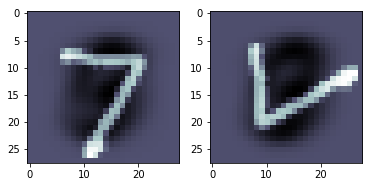

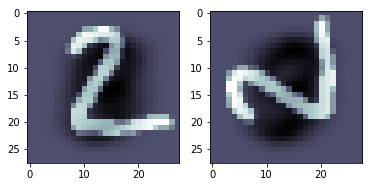

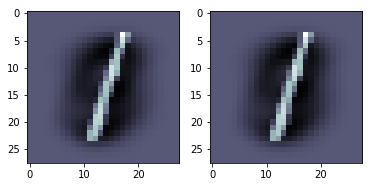

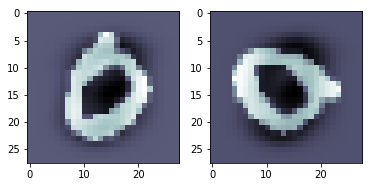

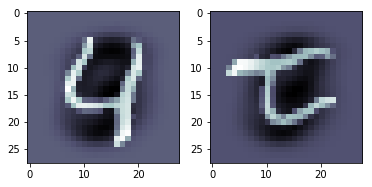

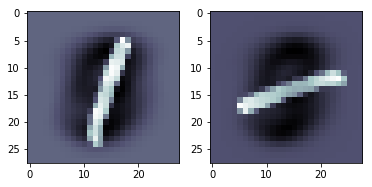

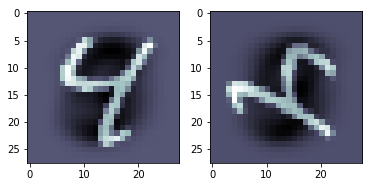

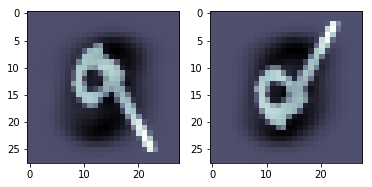

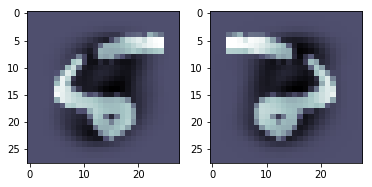

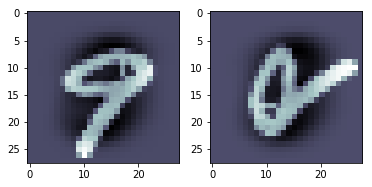

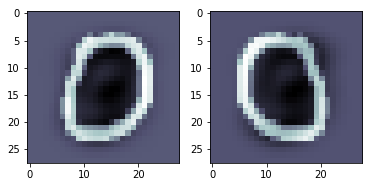

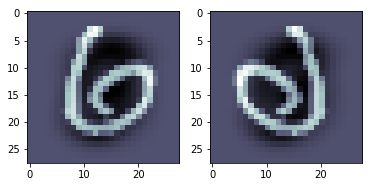

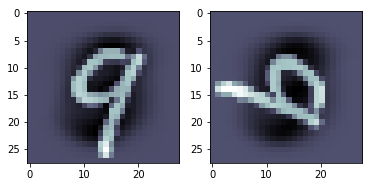

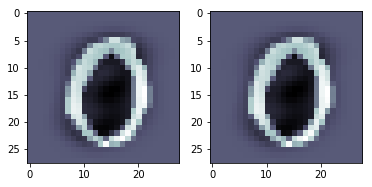

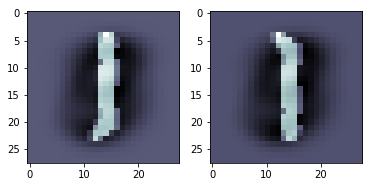

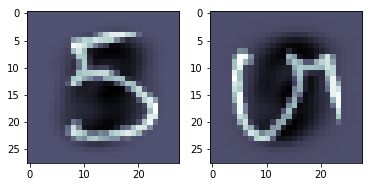

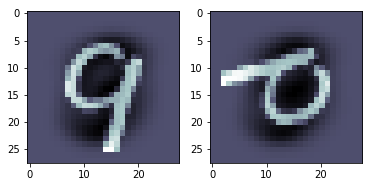

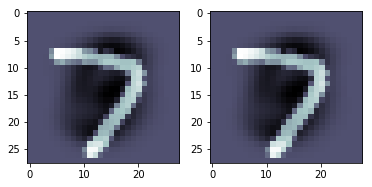

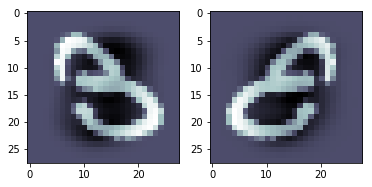

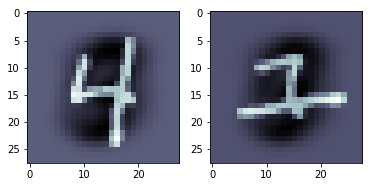

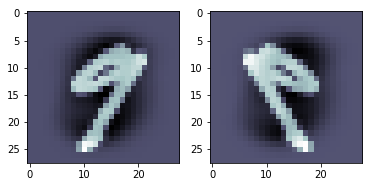

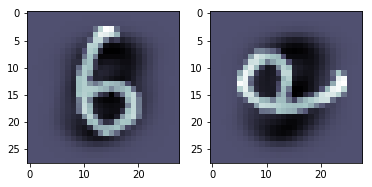

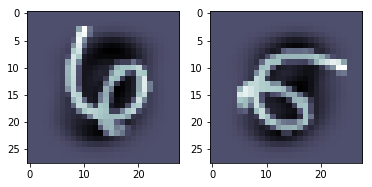

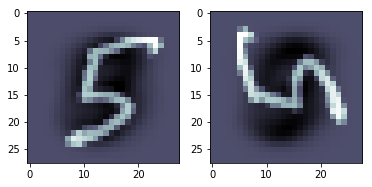

In [5]:
j = 0
for x,y in itertools.izip(train_set, train_set_flipped):
    
    for i in range(x[0].shape[1]):
        plt.subplot(1,2,1)
        plt.imshow(x[0].get()[:,i].reshape(train_set.lshape)[0], cmap='bone')
        plt.subplot(1,2,2)
        plt.imshow(y[0].get()[:,i].reshape(train_set_flipped.crop_shape)[0], cmap='bone')
        plt.show()
        
    j += 1
    if (j >= 1):
        break